# Decision Trees and Random Forest -- Classification

### Load Titanic dataset

In [144]:
import seaborn as sns

data = sns.load_dataset('titanic')
data.shape

(891, 15)

In [145]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [147]:
data = data.drop(['deck', 'alive'], axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [149]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [150]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Split dataset

In [151]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(712, 13)
(179, 13)


In [152]:
X_train = train_set.drop('survived', axis=1)
y_train = train_set['survived']
X_test = test_set.drop('survived', axis=1)
y_test = test_set['survived']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 12)
(712,)
(179, 12)
(179,)


### Prepare data pipeline

In [153]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num_attributes = ['pclass', 'age', 'sibsp', 'parch', 'fare']
cat_attributes = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),
    (StandardScaler())
)

cat_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(handle_unknown='ignore'))
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

X_train_prepared = preprocessing.fit_transform(X_train)

In [154]:
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=preprocessing.get_feature_names_out(), index=X_train.index)
X_train_prepared_df.head()

,num__pclass,num__age,num__sibsp,num__parch,num__fare,cat__sex_female,cat__sex_male,cat__embarked_C,cat__embarked_Q,cat__embarked_S,cat__class_First,cat__class_Second,cat__class_Third,cat__who_child,cat__who_man,cat__who_woman,cat__adult_male_False,cat__adult_male_True,cat__embark_town_Cherbourg,cat__embark_town_Queenstown,cat__embark_town_Southampton,cat__alone_False,cat__alone_True
331,-1.614136,1.232263,-0.470722,-0.479342,-0.078684,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
733,-0.400551,-0.500482,-0.470722,-0.479342,-0.377145,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
382,0.813034,0.192616,-0.470722,-0.479342,-0.474867,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
704,0.813034,-0.269449,0.379923,-0.479342,-0.476230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
813,0.813034,-1.809667,2.931860,2.048742,-0.025249,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [155]:
X_train_prepared_df.shape

(712, 23)

In [156]:
X_train_prepared_df.isnull().sum()

num__pclass                     0
num__age                        0
num__sibsp                      0
num__parch                      0
num__fare                       0
cat__sex_female                 0
cat__sex_male                   0
cat__embarked_C                 0
cat__embarked_Q                 0
cat__embarked_S                 0
cat__class_First                0
cat__class_Second               0
cat__class_Third                0
cat__who_child                  0
cat__who_man                    0
cat__who_woman                  0
cat__adult_male_False           0
cat__adult_male_True            0
cat__embark_town_Cherbourg      0
cat__embark_town_Queenstown     0
cat__embark_town_Southampton    0
cat__alone_False                0
cat__alone_True                 0
dtype: int64

## DecisionTreeClassifier

In [157]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('clf', DecisionTreeClassifier(max_depth=50, min_samples_split=8, max_features='sqrt', random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'embarked', 'class',
                                                   'who', 'adult_male',
                                                   'embark_town', 'alone'])])),
                ('clf',
                 DecisionTreeClassifier(max_depth=50, max_features='sqrt',
                                        min_samples_split=8,
                                        random_state=42))])

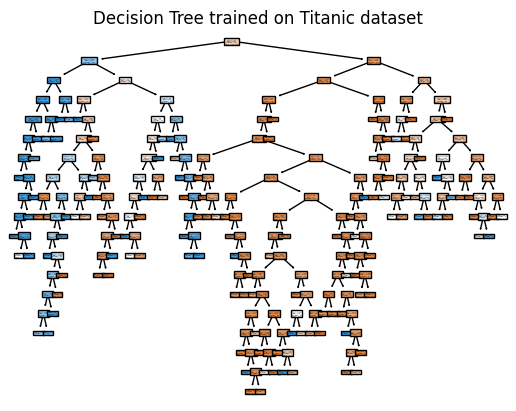

In [158]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()

plot_tree(pipeline['clf'], filled=True)
plt.title("Decision Tree trained on Titanic dataset")
plt.show()

### Evaluation matrices

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix

def all_metrices(pipeline, X_train, y_train, X_test, y_test):

    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    
    print("Accuracy")
    print("Train Set: ", accuracy_score(y_train, train_pred))
    print("Test Ste", accuracy_score(y_test, test_pred))
    print()
    
    print("Precision")
    print("Train Set: ", precision_score(y_train, train_pred))
    print("Test Ste", precision_score(y_test, test_pred))
    print()
    
    print("ReCall")
    print("Train Set: ", recall_score(y_train, train_pred))
    print("Test Ste", recall_score(y_test, test_pred))
    print()
    
    print("F1_Score")
    print("Train Set: ", f1_score(y_train, train_pred))
    print("Test Ste", f1_score(y_test, test_pred))

    print("Clasification Report\n")
    print("Train Set: ", classification_report(y_train, train_pred), '\n')
    print("Test Ste", classification_report(y_test, test_pred))

    print("Confusion Matrix\n")
    print("Train Set:\n",confusion_matrix(y_train, train_pred), '\n')
    print("Test Set\n",confusion_matrix(y_test, test_pred))

In [162]:
all_metrices(pipeline, X_train, y_train, X_test, y_test)

Accuracy
Train Set:  0.8974719101123596
Test Ste 0.8100558659217877

Precision
Train Set:  0.9148936170212766
Test Ste 0.8125

ReCall
Train Set:  0.8022388059701493
Test Ste 0.7027027027027027

F1_Score
Train Set:  0.8548707753479126
Test Ste 0.7536231884057971
Clasification Report

Train Set:                precision    recall  f1-score   support

           0       0.89      0.95      0.92       444
           1       0.91      0.80      0.85       268

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712
 

Test Ste               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix

Train Set:
 [[424  20

### ROC-AUC Curve

In [163]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(pipeline, X_test, y_test):
    y_scores = pipeline.predict_proba(X_test)[:, 1]   # class 1
    fpr, tpr, threshold = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    plt.plot(fpr, tpr, c='b', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

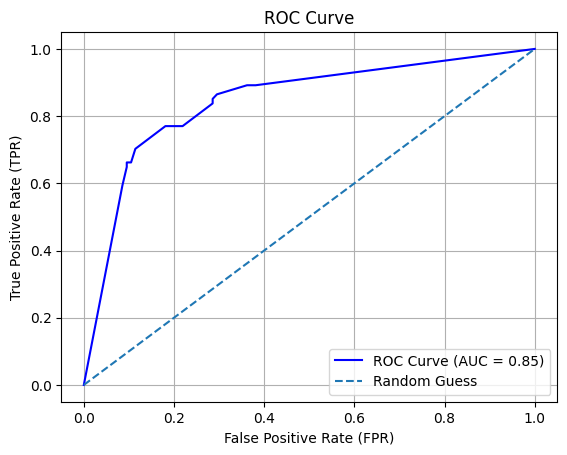

In [164]:
plot_roc_auc(pipeline, X_test, y_test)

## RandomForestClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('preprocessing', preprocessing),
    ('clf', RandomForestClassifier(n_estimators=50, max_depth=100, min_samples_split=8, max_features='sqrt', random_state=42))
])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'embarked', 'class',
                                                   'who', 'adult_male',
                                                   'embark_town', 'alone'])])),
                ('clf',
                 RandomForestClassifier(max_depth=100, min_samples_split=8,
                                        n_estimators=50, random_state=42))])

In [166]:
all_metrices(pipeline_rf, X_train, y_train, X_test, y_test)

Accuracy
Train Set:  0.9002808988764045
Test Ste 0.8491620111731844

Precision
Train Set:  0.9156118143459916
Test Ste 0.8405797101449275

ReCall
Train Set:  0.8097014925373134
Test Ste 0.7837837837837838

F1_Score
Train Set:  0.8594059405940594
Test Ste 0.8111888111888111
Clasification Report

Train Set:                precision    recall  f1-score   support

           0       0.89      0.95      0.92       444
           1       0.92      0.81      0.86       268

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712
 

Test Ste               precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Confusion Matrix

Train Set

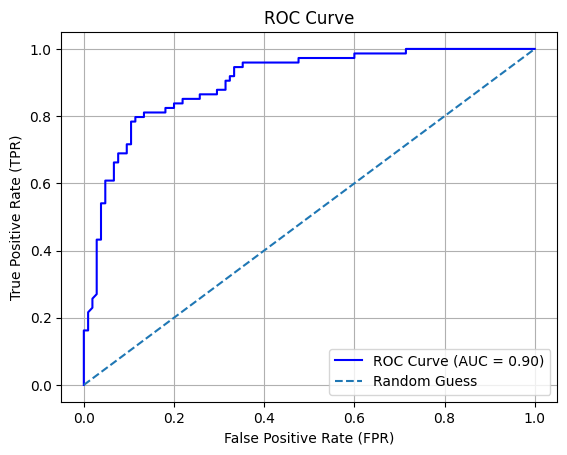

In [167]:
plot_roc_auc(pipeline_rf, X_test, y_test)